In [23]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Unzip

In [33]:
data_dir = r"C:\\physics_masters\\data\\Bossa public market data\\pub\\intraday\\mstock\\fut"
output_dir = r"C:\\physics_masters\\data\\Bossa public market data\\pub\\intraday_unzip\\mstock"

for filename in os.listdir(data_dir):
    zip_path = os.path.join(data_dir, filename)
    
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(output_dir)

In [36]:
# additional polishing for mstock

data_dir = r"C:\\physics_masters\\data\\Bossa public market data\\pub\\intraday_unzip\\mstock"
output_dir = r"C:\\physics_masters\\data\\Bossa public market data\\pub\\intraday_unzip\\mstock"

os.makedirs(output_dir, exist_ok=True)

header = ["Name", "Date", "Time", "Open", "High", "Low", "Close", "Volume", "Oi"]

for filename in os.listdir(data_dir):
    if filename.endswith(".prn"):
        file_path = os.path.join(data_dir, filename)
        df = pd.read_csv(file_path, delimiter=',', header=None)
        df.drop(columns=[1], inplace=True)  # Remove the second column
        df.to_csv(os.path.join(output_dir, filename), index=False, header=header)

Create daily data

In [39]:
def create_daily_data(data_dir, output_dir):
    dataframes = dict()

    for filename in os.listdir(data_dir):
        path = os.path.join(data_dir, filename)
        df = pd.read_csv(path, delimiter=',', header=0)
        #df.columns = ["Name", "Date", "Time", "Open", "High", "Low", "Close", "Volume", "Oi"]
        #df["Date"] = pd.to_datetime(df["Date"])
        # daily_diff = df.groupby("Date").agg({"Low": "first", "High": "last"})
        # daily_diff["DateDiff"] = daily_diff["High"] - daily_diff["Low"]
        #daily_diff = daily_diff[["DateDiff"]]
        
        daily = df.groupby("Date").agg({"High": "last"})
        daily["DiffPrevDate"] = daily["High"].diff()
        
        # standarisation - so far without the 30 day std
        daily["DiffPrevDate"] = (daily["DiffPrevDate"] - daily["DiffPrevDate"].mean()) / daily["DiffPrevDate"].std()
        
        output_file = os.path.join(output_dir, filename)
        daily.to_csv(output_file)
        dataframes[filename.replace('.prn', '')]=len(daily)
    
    df = pd.DataFrame(dataframes.items(), columns=['Asset', 'TotalDays'])
    df.to_csv(rf'C:\\physics_masters\\data\\{output_dir.split("\\")[-1]}_summary.txt', sep='\t', index=False)
    

In [42]:
data_dir = r"C:\\physics_masters\\data\\Bossa public market data\\pub\\intraday\\omega"
output_dir = r"C:\\physics_masters\\data\\Bossa public market data\\pub\\daily\\omega"

create_daily_data(data_dir, output_dir)

data_dir = r"C:\\physics_masters\\data\\Bossa public market data\\pub\\intraday\\mstock"
output_dir = r"C:\\physics_masters\\data\\Bossa public market data\\pub\\daily\\mstock"

create_daily_data(data_dir, output_dir)

In [ ]:
data_dir = r"C:\\physics_masters\\data\\Bossa public market data\\pub\\intraday\\omega\\cgl"
output_dir = r"C:\\physics_masters\\data\\Bossa public market data\\pub\\daily\\omega"

os.makedirs(output_dir, exist_ok=True)

dataframes = []

for filename in os.listdir(data_dir):
    if filename.endswith(".zip"):
        zip_path = os.path.join(data_dir, filename)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            for file in zip_ref.namelist():
                if file.endswith(".prn"):  # Ensure it is a .prn file
                    with zip_ref.open(file) as f:
                        # Read the data into a DataFrame
                        df = pd.read_csv(f, delimiter=',', header=0)
                        df.columns = ["Name", "Date", "Time", "Open", "High", "Low", "Close", "Volume", "Oi"]
                        df["Date"] = pd.to_datetime(df["Date"])
                        
                        # Calculate date diff: latest High - earliest Low per date
                        daily_diff = df.groupby("Date").agg({"Low": "first", "High": "last"})
                        daily_diff["DateDiff"] = daily_diff["High"] - daily_diff["Low"]
                        daily_diff = daily_diff[["DateDiff"]]
                        
                        # Calculate difference between dates
                        daily_diff["DateDiffPrev"] = daily_diff["DateDiff"].diff()
                        
                        # Save to CSV
                        output_file = os.path.join(output_dir, file.replace(".prn", ".csv"))
                        daily_diff.to_csv(output_file)
                        dataframes.append(daily_diff)

print(f"Processed {len(dataframes)} files and saved in {output_dir}")

In [ ]:
data_dir = r"C:\\physics_masters\\data\\Bossa public market data\\pub\\intraday\\omega\\cgl"
headers = []

for filename in os.listdir(data_dir):
    if filename.endswith(".zip"):
        zip_path = os.path.join(data_dir, filename)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            for file in zip_ref.namelist():
                if file.endswith(".prn"):  # Ensure it is a .prn file
                    with zip_ref.open(file) as f:
                        # Read the first line as header
                        header_line = f.readline().decode(errors='ignore').strip()
                        headers.append(header_line)

print("Unique headers found:")
print(headers[0])


Unique headers found:
"Name","Date","Time","Open","High","Low","Close","Volume","Oi"


In [ ]:


data_dir = r"C:\\physics_masters\\data\\Bossa public market data\\pub\\intraday\\omega\\cgl"

dataframes = []
i = 0
for filename in os.listdir(data_dir):
    if filename.endswith(".zip"):
        zip_path = os.path.join(data_dir, filename)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            for file in zip_ref.namelist():
                if file.endswith(".prn"):  # Ensure it is a .prn file
                    with zip_ref.open(file) as f:
                        # Read the data into a DataFrame
                        df = pd.read_csv(f, delimiter=',', header=0)
                        df.columns = ["Name", "Date", "Time", "Open", "High", "Low", "Close", "Volume", "Oi"]
                        # df["Date"] = pd.to_datetime(df["Date"])
                        df["Diff"] = df["Close"] - df["Open"]
                        df = df[["Date", "Time", "Diff"]]
                        df.rename(columns={"Diff": file.replace(".prn", "")}, inplace=True)
                        dataframes.append(df)
                        i += 1
                        print(f"Processed {i} files")

# Merge all DataFrames on Date and Time
# result_df = dataframes[0]
# for df in dataframes[1:]:
#     result_df = pd.merge(result_df, df, on=["Date", "Time"], how="outer")

# # Normalize each column (subtract mean and divide by std)
# columns_to_normalize = result_df.columns.difference(["Date", "Time"])
# result_df[columns_to_normalize] = result_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())

# # Compute R^T @ R
# R = result_df[columns_to_normalize].to_numpy().T
# cov_matrix = R @ R.T

# # Plot the matrix
# plt.imshow(cov_matrix, cmap='hot', interpolation='nearest')
# plt.colorbar()
# plt.title("R^T @ R Matrix")
# plt.show()

# print(result_df)


Processed 1 files
Processed 2 files
Processed 3 files
Processed 4 files
Processed 5 files
Processed 6 files
Processed 7 files
Processed 8 files
Processed 9 files
Processed 10 files
Processed 11 files
Processed 12 files
Processed 13 files
Processed 14 files
Processed 15 files
Processed 16 files
Processed 17 files
Processed 18 files
Processed 19 files
Processed 20 files
Processed 21 files
Processed 22 files
Processed 23 files
Processed 24 files
Processed 25 files
Processed 26 files
Processed 27 files
Processed 28 files
Processed 29 files
Processed 30 files
Processed 31 files
Processed 32 files
Processed 33 files
Processed 34 files
Processed 35 files
Processed 36 files
Processed 37 files
Processed 38 files
Processed 39 files
Processed 40 files
Processed 41 files
Processed 42 files
Processed 43 files
Processed 44 files
Processed 45 files
Processed 46 files
Processed 47 files
Processed 48 files
Processed 49 files
Processed 50 files
Processed 51 files
Processed 52 files
Processed 53 files
Pr

In [14]:
result_df = dataframes[0]
for df in dataframes[1:30]:
    result_df = pd.merge(result_df, df, on=["Date", "Time"], how="outer")

In [16]:
columns_to_normalize = result_df.columns.difference(["Date", "Time"])
result_df[columns_to_normalize] = result_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())

In [21]:
R = result_df[columns_to_normalize].to_numpy().T
R[np.isnan(R)] = 0  # Replace NaN with 0 for covariance calculation
cov_matrix = R @ R.T

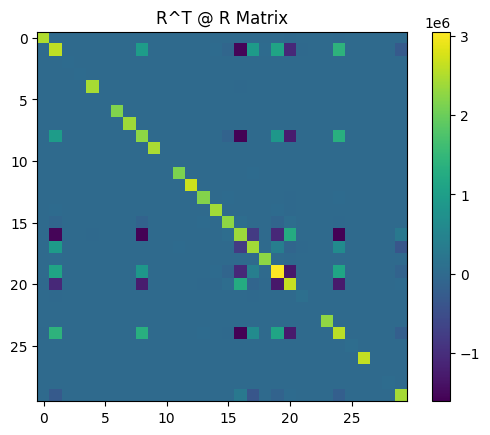

In [22]:
plt.imshow(cov_matrix)
plt.colorbar()
plt.title("R^T @ R Matrix")
plt.show()